# <font color=#0066ff> Market Rates Integration </font>


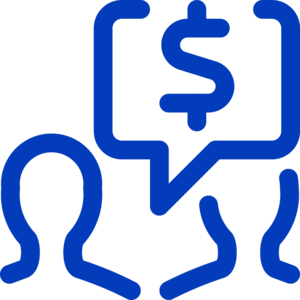

## <font color='yellow'>Code for token generation and API management</font>
      

In [ ]:
#@title Select **servicePack** the Sample should run
from subprocess import getstatusoutput
servicePack = "DEMO" #@param ['DEMO'] {allow-input: true}

if servicePack == 'DEMO':
  branch = 'main'
else:
  branch = servicePack
print(branch)
rm = getstatusoutput("rm Colab_shared_code_for_API_usage -rf ") 
clone = getstatusoutput("git clone -l -s --branch " +  branch + " https://github.com/kyriba/Colab_shared_code_for_API_usage.git") 
import importlib
try:  
  importlib.reload(sample_requests)
except:
  print()
from Colab_shared_code_for_API_usage import sample_requests

In [ ]:
#@title Import custom modules

import time
import matplotlib
from pprint import pprint
import matplotlib.pyplot as plot
from datetime import datetime,date
import random


## <font color='yellow'>Connect and  retrieve token</font>


In [ ]:
#@title <font color='lime'>Connect</font>
print('token:')
token = sample_requests.login()

## <font color='yellow'>Set-up and import FX rate</font>

In [ ]:
#@title <font color='lime'>Enter FX Rate</font>
currency = "CAD" #@param ["USD", "GBP", "CAD"]
spotDate = "2021-10-21" #@param {type:"date"}
bid =  1.13#@param {type:"number"}
ask = 1.14 #@param {type:"number"}
usePayload = True #@param {type:"boolean"}
traces = True #@param {type:"boolean"}

transformedDate =   spotDate[5:7] + spotDate[8:10]  + spotDate [0:4] 

data = ("FX" + transformedDate + "MANUAL    "+currency+"                 "+str(bid)+"              "+str(ask)+"\n")

today = date.today()
now = datetime.now()
dt_string = str(today) + 'T' + now.strftime("%H:%M")
filename = dt_string + "-" + currency + ".csv"
if traces:
  print('data:' + data)
  if usePayload:
    print('data will be sent by payload\n')
  else:
    print('data will be sent by file:' + filename + '\n')
  
res = sample_requests.import_data(token, data, filename,'API_IMP_MD', usePayload, traces)